In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline
plt.rcParams['figure.figsize']=(15,10)

df = pd.read_csv('~/Downloads/OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.columns = df.columns.str.replace(' ', '')


df = df.rename(columns={'weekday_is_monday': 'monday', 'weekday_is_tuesday': 'tuesday', 'weekday_is_wednesday': 'wednesday', 'weekday_is_thursday': 'thursday', 'weekday_is_friday': 'friday', 'weekday_is_saturday': 'saturday', 'weekday_is_sunday': 'sunday', 'is_weekend': 'weekend'})
df = df.rename(columns={'data_channel_is_lifestyle':'lifestyle', 'data_channel_is_entertainment':'entertainment', 'data_channel_is_bus':'business', 'data_channel_is_socmed':'social_media', 'data_channel_is_tech':'technology', 'data_channel_is_world':'world'})
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Data Visualization and Attribute Relationships

The following section shows bar charts and cross tabulations of the relationships between the different attributes and the shares for each day of the week. To start with the visualization, the following data points were added to help with representing the data.

<br>
##### Created a new function to help with consolidating the weekday columns into one categorical variable/column

In [25]:
#create a function to consolidate all the weekday_is_[monday....sunday] columns to one single colum "weekday"
def label_weekday (row):
   if row['monday'] == 1 :
      return "Monday"
   if row['tuesday'] == 1 :
      return "Tuesday"
   if row['wednesday'] == 1 :
      return "Wednesday"
   if row['thursday'] == 1 :
      return "Thursday" 
   if row['friday'] == 1 :
      return "Friday"
   if row['saturday'] == 1 :
      return "Saturday"  
   if row['sunday'] == 1 :
      return "Sunday"
   return 'Other'

Apply the function to the weekday column

In [26]:
#adding a new weekday column
df['weekday'] = df.apply (lambda row: label_weekday (row),axis=1)

Review the newly created column, to verify the data type

In [27]:
df[['weekday']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 1 columns):
weekday    39644 non-null object
dtypes: object(1)
memory usage: 309.8+ KB


Reviewed the unique data values in the column weekday

In [28]:
#review if the newly added column, had unique data from Monday..to..Sunday
df.weekday.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

<br>
##### Created a new column called "popularity", the shares data point was split into either Low, Medium or High equal-sized buckets based on rank or based on sample quantiles.

In [29]:
#adding a new popularity column
df['popularity'] = pd.qcut(df['shares'].values, 3, labels=["Low","Medium","High"])

In [30]:
#review if the newly added column, had unique data from Low to High
df.popularity.unique()

[Low, Medium, High]
Categories (3, object): [Low < Medium < High]

<br>
A subset of data was created to further the research on the data sets, the subset of data was called df_subset, it was limited to the 'num_imgs','num_videos','num_keywords','popularity','weekday' and 'shares' columns so that it would be easier to perform some ad-hoc analysis/visualization on these data sets.

In [31]:
# limiting to columns that are needed for visualization
df_subset = df[['num_imgs','num_videos','num_keywords','popularity','weekday','shares']].copy()
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 6 columns):
num_imgs        39644 non-null float64
num_videos      39644 non-null float64
num_keywords    39644 non-null float64
popularity      39644 non-null category
weekday         39644 non-null object
shares          39644 non-null int64
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [32]:
# creating different cross tabs to perform further analysis
df_popularity = pd.crosstab([df['popularity']], df.shares.count())
df_week = pd.crosstab([df['weekday']], df.shares.count())
df_corr = pd.crosstab([df['popularity'], df['weekday']], df.shares.count())

In [33]:
print (df_popularity)


col_0       39644
popularity       
Low         14732
Medium      11957
High        12955


In [34]:
print (df_week)

col_0      39644
weekday         
Friday      5701
Monday      6661
Saturday    2453
Sunday      2737
Thursday    7267
Tuesday     7390
Wednesday   7435


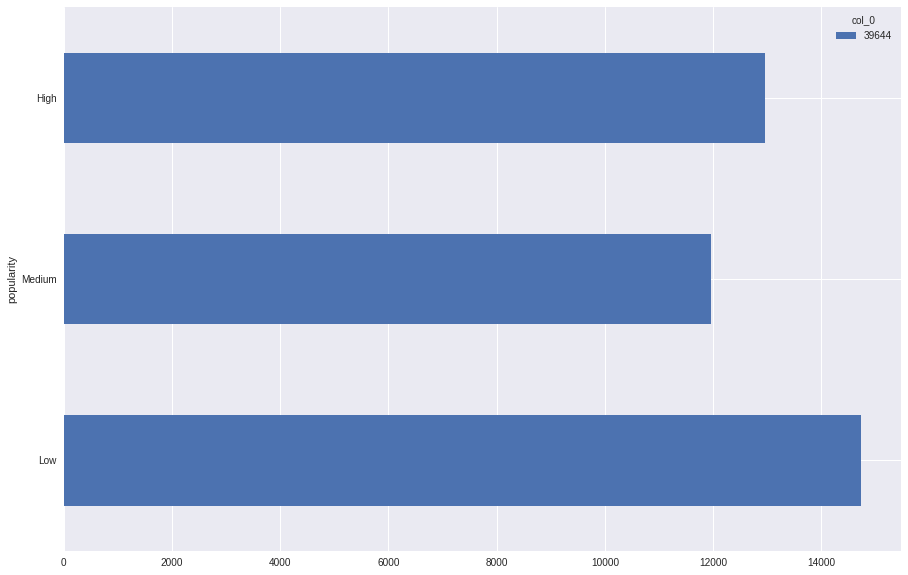

In [35]:
df_popularity.plot(kind='barh')

<br>
In this plot we split the column shares into equal-sized buckets based on rank or based on sample quantiles and labelled them as low, medium, high.[Low < Medium < High].
In this bar chart we are graphing the count of tweets against the number of times the tweet was shared. This is tracked in the popularity column as High, Medium and Low. We can see that the Low popularity had more counts because most of the articles fall under that criteria, due to the fact that they dont get shared as much.

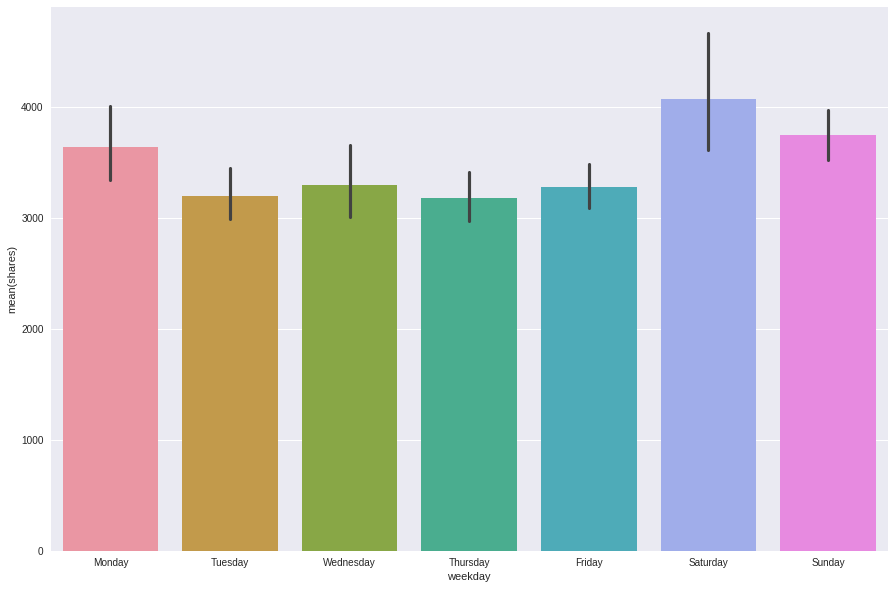

In [50]:
ax = sns.barplot(x="weekday", y="shares",data=df_subset)

In this bar chart we are graphing the count of tweets against the day the article was published (day of the week). This is tracked in the weekday column. We can see that articles published on Tuesday, Wednesday and Thursday get shared more than any other day of the week



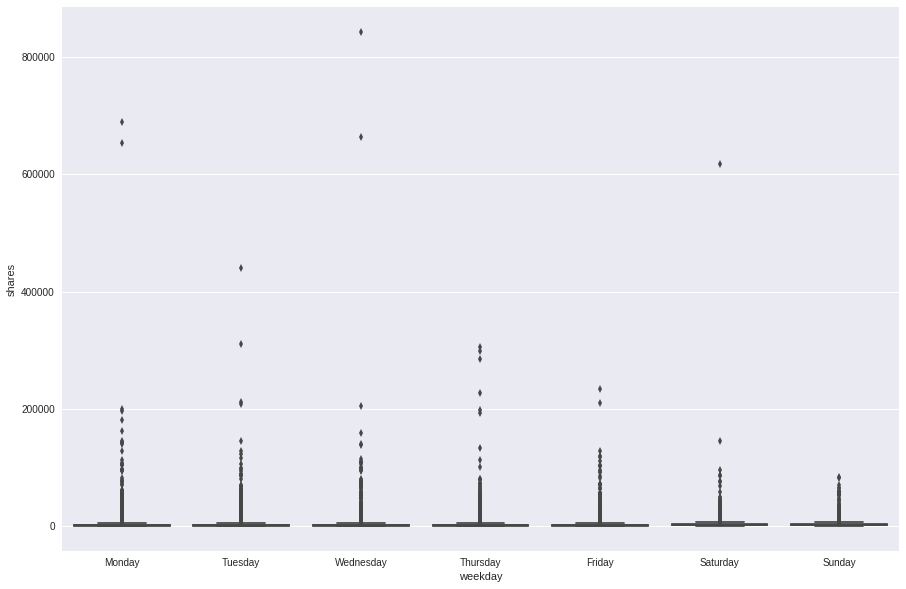

In [37]:
ax = sns.boxplot(x="weekday", y="shares",data=df_subset)

From the above box plot, we wanted to identifying any outliers and perform some comparisons by weekday. As we can see there are some extreme outliers present in the data, among them the data set for Monday, Tuesday, Wednesday and Saturday have extreme spread. From this we can speculate that there is no guarantee that an article will be shared more depending on the weekday it was published

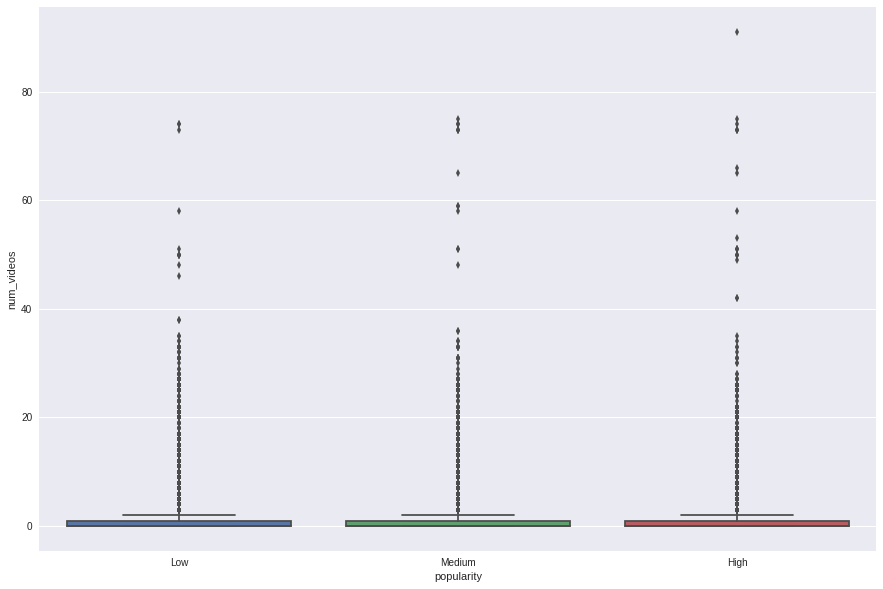

In [38]:
ax = sns.boxplot(x="popularity", y="num_videos",data=df_subset)

Similarly to the previous box plot, we wanted to identify any outliers when comparing by popularity, as we can see all the three outcomes had extreme outliers, among them "high" had extreme spread. 

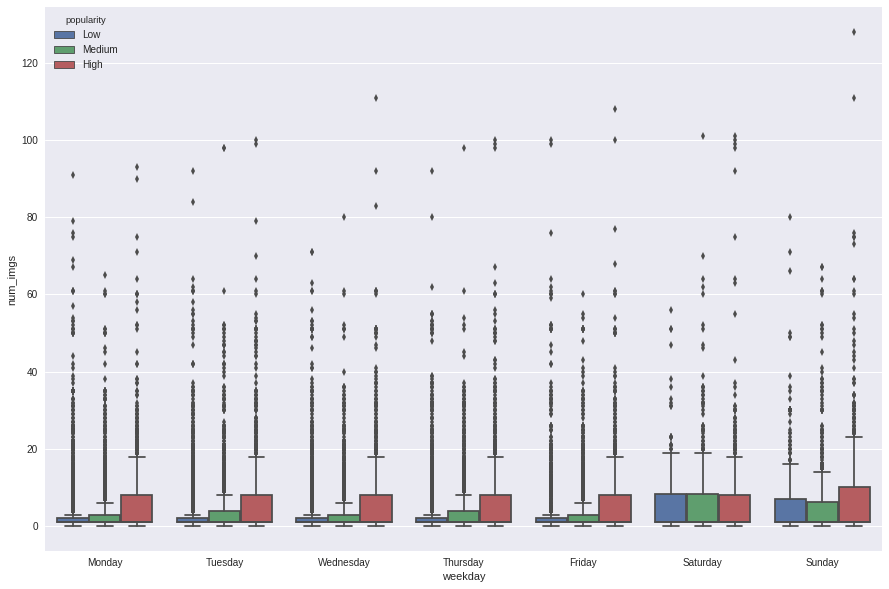

In [39]:

ax = sns.boxplot(x="weekday", y="num_imgs",hue="popularity",data=df_subset)

Similarly to the previous box plot, we wanted to identify any outliers when comparing articles with number of images by weekday, as we can see all the outcomes had extreme outliers.

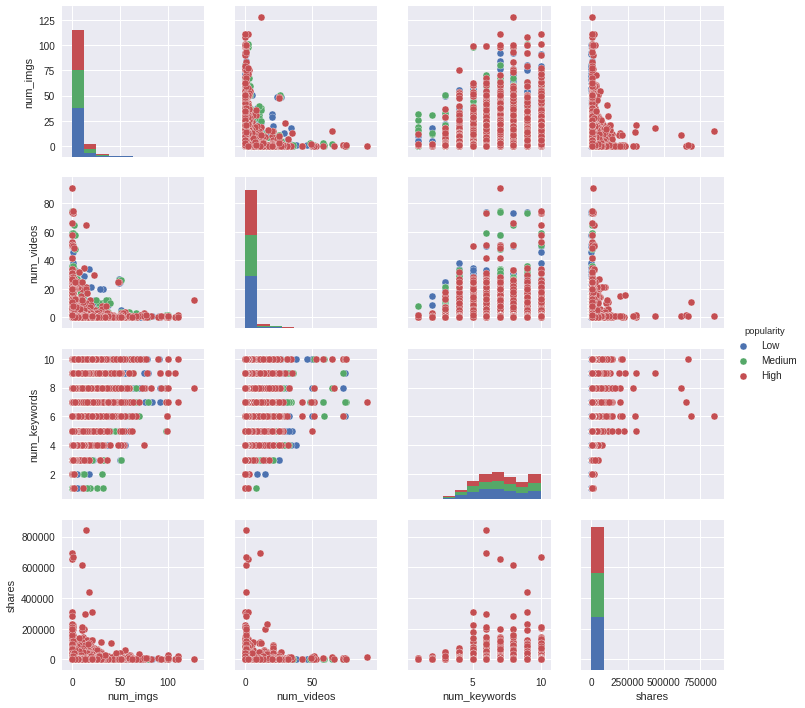

In [40]:
sns.pairplot(df_subset,hue='popularity')

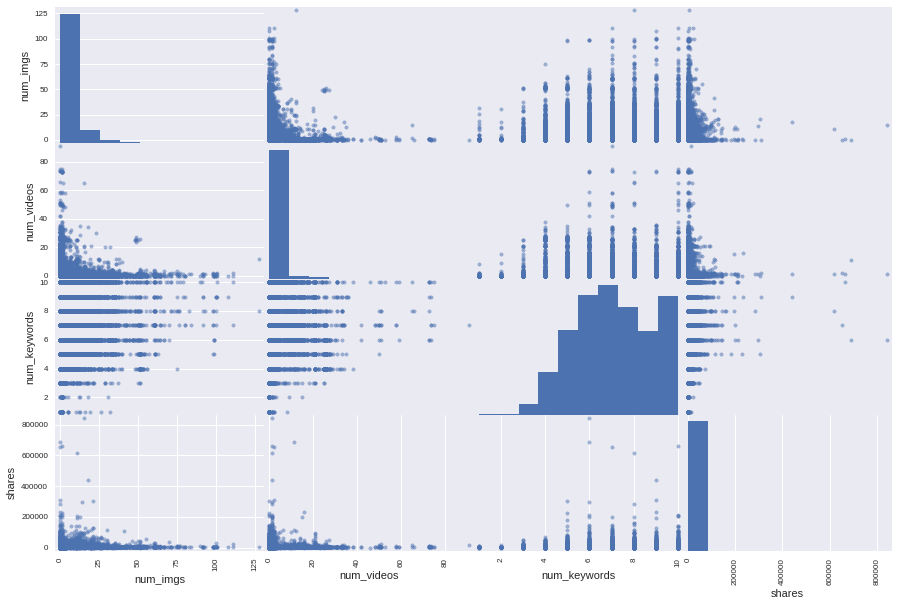

In [41]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(df_subset, figsize=(15,10))

Scatterplot matrix and the pairplot matrix are showing us similar information, these plots helped us to understand correlation as Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. Data is not spread out in a linear fashion when looking at these plots, at most the data points are clumped to the left, bottom corner of the graph. This shows that there is no valid correlation between the number of images increases the popularity to be "High" etc.

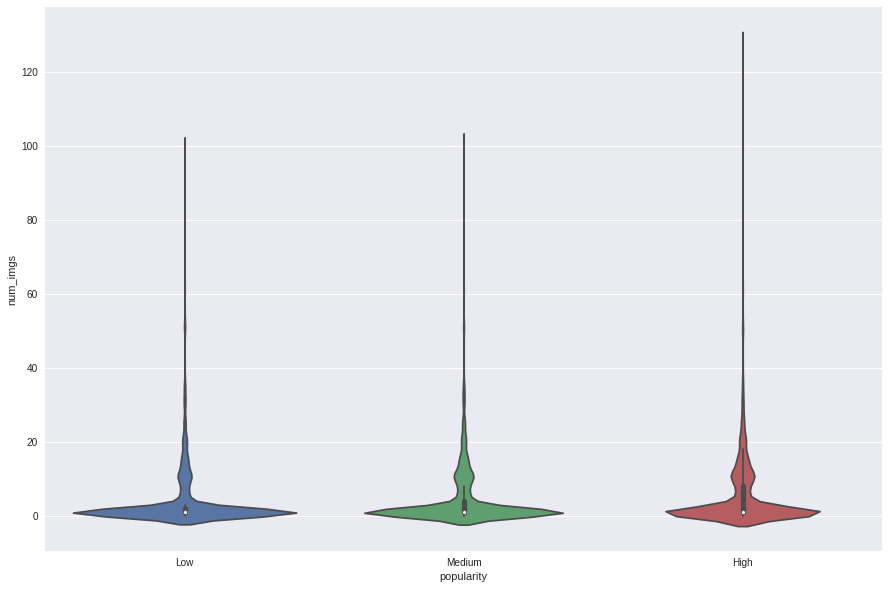

In [42]:
sns.violinplot(x="popularity", y="num_imgs",data=df_subset)

In this plot we are graphing the number of images present in an article to it popularity. Similar to box plot, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories". from the above plot we can see how the density of data decreases as the popularity increases.

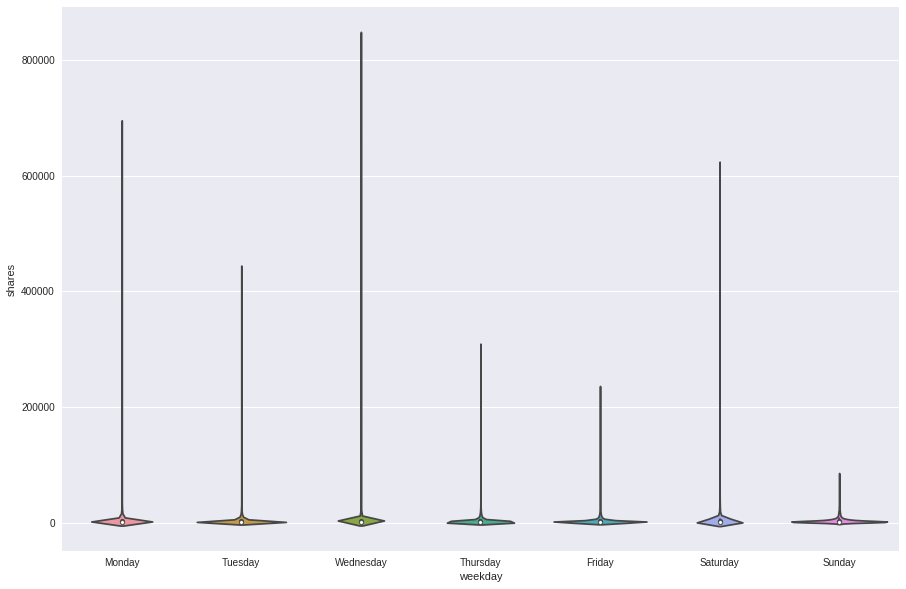

In [43]:
sns.violinplot(x="weekday", y="shares",data=df_subset)

In this plot we are graphing the count of articles shared to the day it was published. From the violin plot we can see more data density for Tuesday, Friday and Sunday.

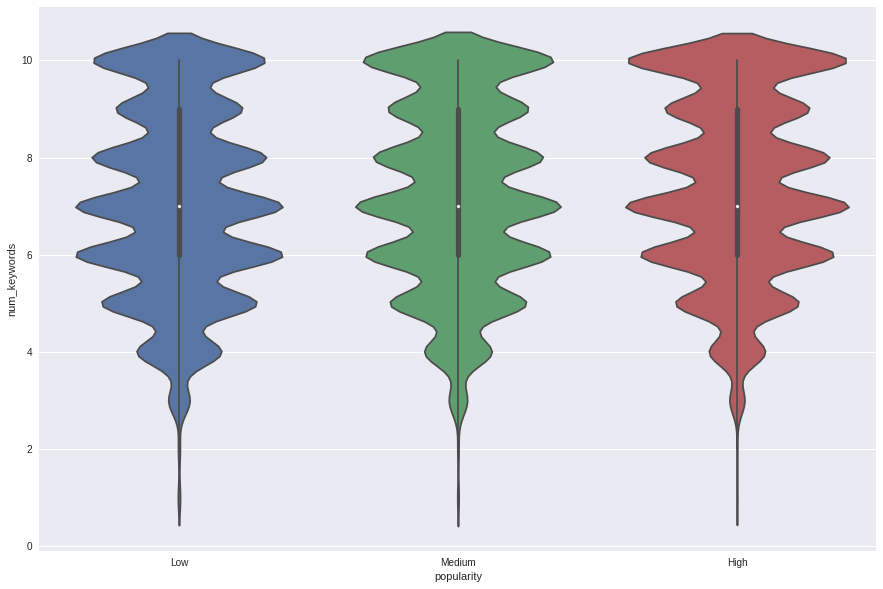

In [44]:
sns.violinplot(x="popularity", y="num_keywords",data=df_subset)

In this plot we are graphing number of keywords present in the article to its popularity. From the violin plot we can see similar data density for each of the popularity criteria. 

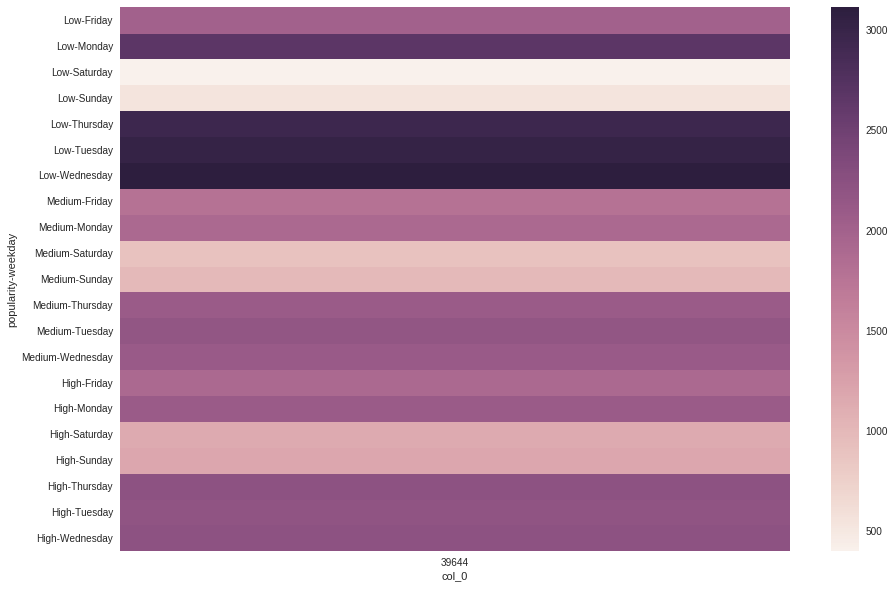

In [45]:
sns.heatmap(df_corr)


From the heatmap we can see that the Low popularity should be a darker shade, because there are more articles that fall under that criteria.Which means some articles only got shared a couple of times, and from the plot we can see that Wednesdays are when articles get read and shared, however this does not mean the article is popular, it only means the article was read and it appealed to certain crowd.